## 泰坦尼克号数据可视化分析练习
**原文章发现了错误,在下文有提到**

In [24]:
# 忽略警告提示
import warnings
warnings.filterwarnings('ignore')

#导入处理数据包
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False 
plt.rcParams.update({'font.size': 20}) # 设置字体大小

#导入数据
#训练数据集
train = pd.read_csv(r'H:\download\titanic\train.csv')

In [25]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [26]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [27]:
n=train["Survived"].value_counts()
print(n)

Survived
0    549
1    342
Name: count, dtype: int64


Text(0.5, 1.0, '总体生还率')

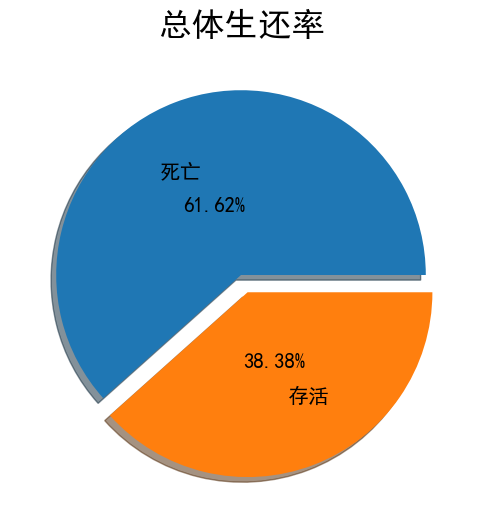

In [28]:
plt.figure(figsize=(6,6))
plt.pie(n,autopct='%.2f%%',labels=['死亡','存活'],pctdistance=0.4,labeldistance=0.6,
       shadow=True,explode=[0,0.1],textprops=dict(size=15))
plt.title('总体生还率')

## 不同性别乘客生还率

Text(0.5, 1.0, '男性生还率')

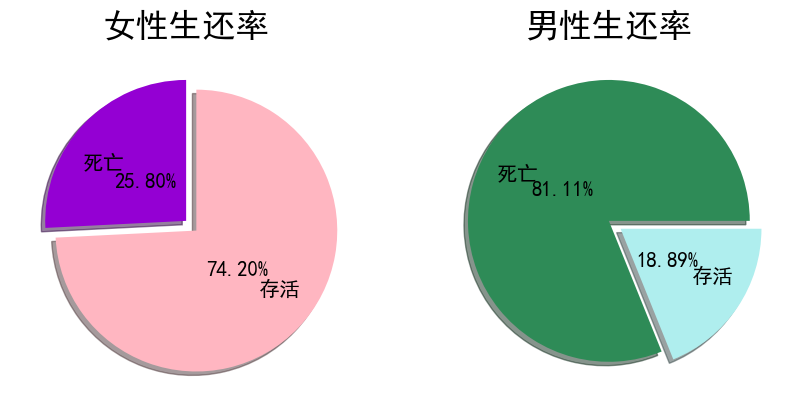

In [29]:
# 不同性别乘客的生还情况
sex_count = train.groupby(by='Sex')['Survived'].value_counts()
# 两张饼图画在同一张图纸上
plt.figure(figsize=(2*5,5))

axes1=plt.subplot(1,2,1)
axes1.pie(sex_count.loc['female'][::-1],autopct='%.2f%%',labels=['死亡','存活'],pctdistance=0.4,labeldistance=0.6,
       shadow=True,explode=[0,0.1],textprops=dict(size=15),colors=['#9400D3','#FFB6C1'],startangle=90)
axes1.set_title('女性生还率')

axes2=plt.subplot(1,2,2)
axes2.pie(sex_count.loc['male'],autopct='%.2f%%',labels=['死亡','存活'],pctdistance=0.4,labeldistance=0.6,
       shadow=True,explode=[0,0.1],textprops=dict(size=15),colors=['#2E8B57','#AFEEEE'])
axes2.set_title('男性生还率')

In [30]:
# 船上年龄范围
age_range = train['Age'] 
display(age_range.min(),age_range.max())

0.42

80.0

In [31]:
# 各年龄阶段人数
age_num,_ = np.histogram(age_range,range=[0,80],bins=16 )
age_num

array([ 40,  22,  16,  86, 114, 106,  95,  72,  48,  41,  32,  16,  15,
         4,   6,   1], dtype=int64)

In [32]:
# 各年龄阶段生还人数
age_survived = []
for age in range(5,81,5):
    survived_num = train.loc[(age_range>=age-5) & (age_range<=age)]['Survived'].sum()
    age_survived.append(survived_num)
age_survived

[31, 11, 11, 37, 45, 48, 51, 39, 23, 21, 15, 8, 6, 0, 0, 1]

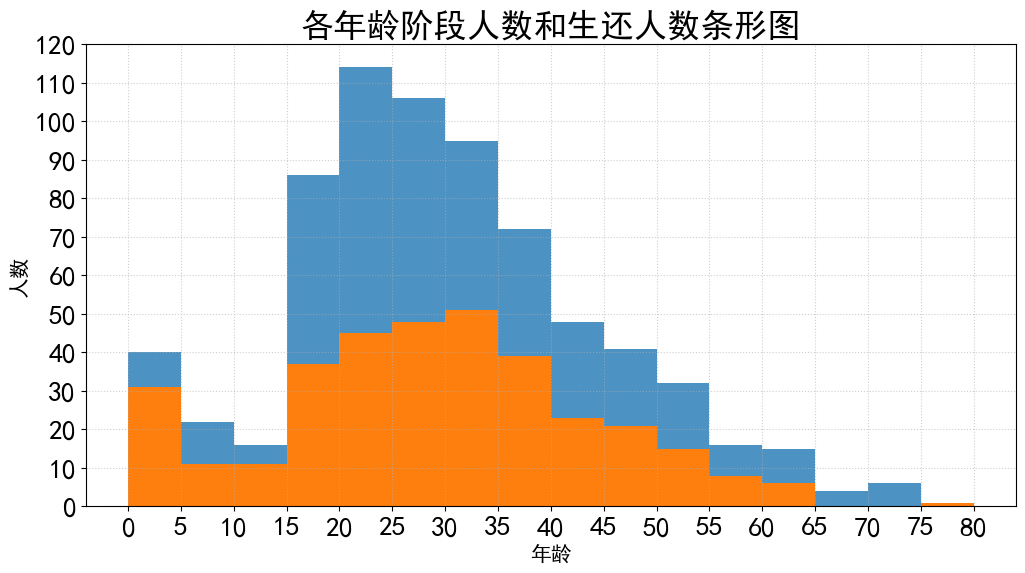

In [33]:
# 绘制条形图
plt.figure(figsize=(12,6))
plt.bar(np.arange(2,78,5)+0.5,age_num,width=5,label='总人数',alpha=0.8)
plt.bar(np.arange(2,78,5)+0.5,age_survived,width=5,label='生还人数')
plt.xticks(range(0,81,5))
plt.yticks(range(0,121,10))
plt.xlabel('年龄',position=(0.95,0),fontsize=15)
plt.ylabel('人数',position=(0,0.95),fontsize=15)
plt.title('各年龄阶段人数和生还人数条形图')
plt.grid(True,linestyle=':',alpha=0.6)

In [34]:
# 不同登入港口乘客的生还情况
embarked_count = train.groupby(by='Embarked')['Survived'].value_counts()
embarked_count

Embarked  Survived
C         1            93
          0            75
Q         0            47
          1            30
S         0           427
          1           217
Name: count, dtype: int64

Text(0.5, 1.0, '英国南安普顿乘客生还率')

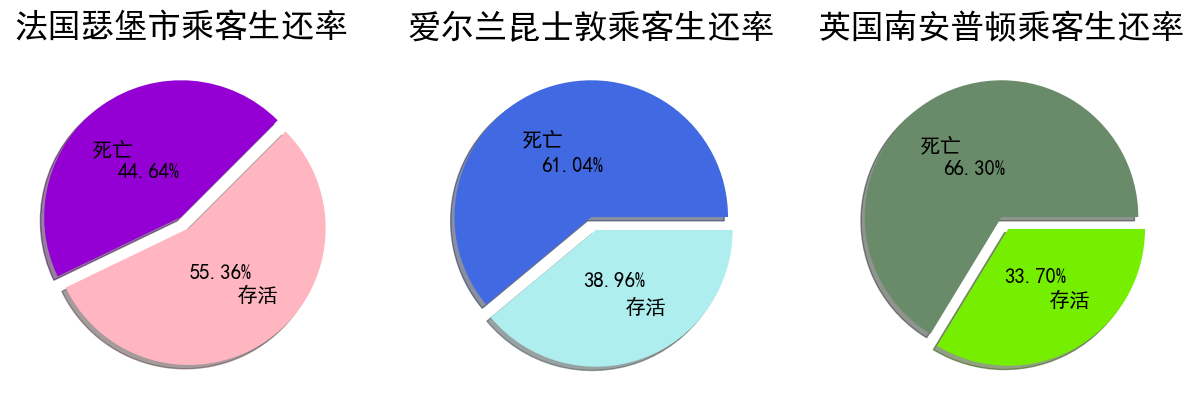

In [35]:
# 三张饼图画在同一张图纸上
plt.figure(figsize=(3*5,5))

axes1=plt.subplot(1,3,1)
axes1.pie(embarked_count.loc['C'][::-1],autopct='%.2f%%',labels=['死亡','存活'],pctdistance=0.4,labeldistance=0.6,
       shadow=True,explode=[0,0.1],textprops=dict(size=15),colors=['#9400D3','#FFB6C1'],startangle=45)
axes1.set_title('法国瑟堡市乘客生还率')

axes2=plt.subplot(1,3,2)
axes2.pie(embarked_count.loc['Q'],autopct='%.2f%%',labels=['死亡','存活'],pctdistance=0.4,labeldistance=0.6,
       shadow=True,explode=[0,0.1],textprops=dict(size=15),colors=['#4169E1','#AFEEEE'])
axes2.set_title('爱尔兰昆士敦乘客生还率')

axes3=plt.subplot(1,3,3)
axes3.pie(embarked_count.loc['S'],autopct='%.2f%%',labels=['死亡','存活'],pctdistance=0.4,labeldistance=0.6,
       shadow=True,explode=[0,0.1],textprops=dict(size=15),colors=['#698B69','#76EE00'])
axes3.set_title('英国南安普顿乘客生还率')

In [36]:
# 不同登入港口乘客的生还情况
pclass_count = train.groupby(by='Pclass')['Survived'].value_counts()
pclass_count

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: count, dtype: int64

Text(0.5, 1.0, '三等舱乘客生还率')

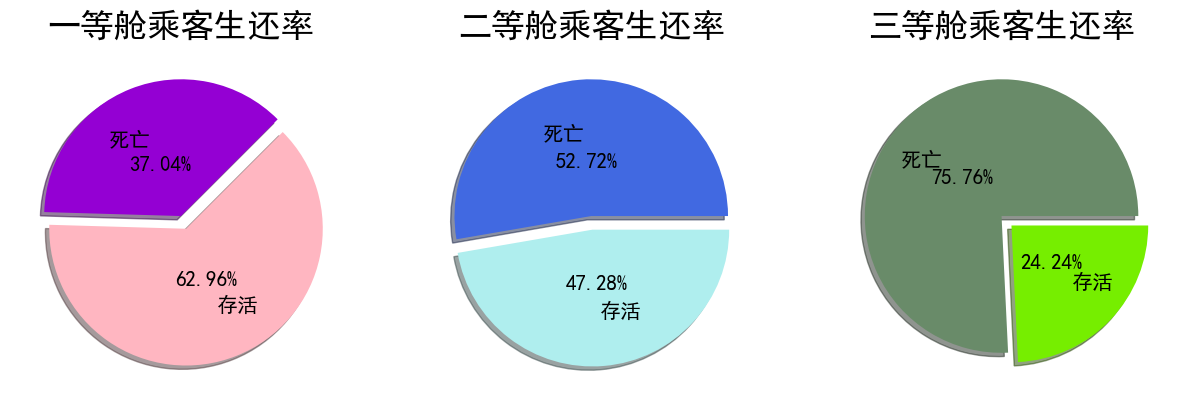

In [37]:
# 三张饼图画在同一张图纸上
plt.figure(figsize=(3*5,5))

axes1=plt.subplot(1,3,1)
axes1.pie(pclass_count.loc[1][::-1],autopct='%.2f%%',labels=['死亡','存活'],pctdistance=0.4,labeldistance=0.6,
       shadow=True,explode=[0,0.1],textprops=dict(size=15),colors=['#9400D3','#FFB6C1'],startangle=45)
axes1.set_title('一等舱乘客生还率')

axes2=plt.subplot(1,3,2)
axes2.pie(pclass_count.loc[2],autopct='%.2f%%',labels=['死亡','存活'],pctdistance=0.4,labeldistance=0.6,
       shadow=True,explode=[0,0.1],textprops=dict(size=15),colors=['#4169E1','#AFEEEE'])
axes2.set_title('二等舱乘客生还率')

axes3=plt.subplot(1,3,3)
axes3.pie(pclass_count.loc[3],autopct='%.2f%%',labels=['死亡','存活'],pctdistance=0.4,labeldistance=0.6,
       shadow=True,explode=[0,0.1],textprops=dict(size=15),colors=['#698B69','#76EE00'])
axes3.set_title('三等舱乘客生还率')

In [38]:
# 不同登入港口乘客的船舱分布情况情况
embarked_pclass = train.groupby(by='Embarked')['Pclass'].value_counts()
embarked_pclass

Embarked  Pclass
C         1          85
          3          66
          2          17
Q         3          72
          2           3
          1           2
S         3         353
          2         164
          1         127
Name: count, dtype: int64

Text(0.5, 1.0, '英国南安普顿乘客生还率')

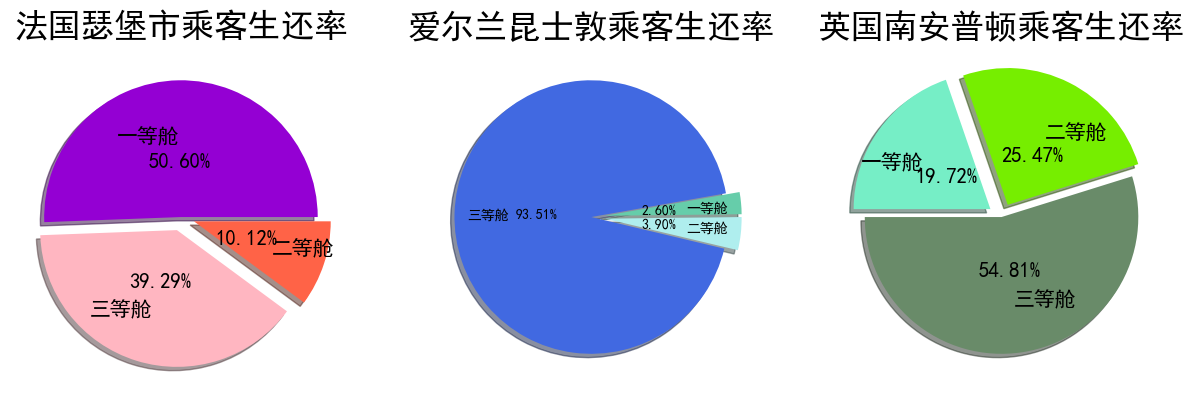

In [39]:
# 三张饼图画在同一张图纸上
plt.figure(figsize=(3*5,5))

axes1=plt.subplot(1,3,1)
axes1.pie(embarked_pclass.loc['C'],autopct='%.2f%%',labels=['一等舱','三等舱','二等舱'],pctdistance=0.4,labeldistance=0.6,
       shadow=True,explode=[0,0.1,0.1],textprops=dict(size=15),colors=['#9400D3','#FFB6C1','#FF6347'])
axes1.set_title('法国瑟堡市乘客生还率')

axes2=plt.subplot(1,3,2)
axes2.pie(embarked_pclass.loc['Q'],autopct='%.2f%%',labels=['三等舱','二等舱','一等舱'],pctdistance=0.4,labeldistance=0.6,
       shadow=True,explode=[0,0.1,0.1],textprops=dict(size=10),colors=['#4169E1','#AFEEEE','#66CDAA'],startangle=10)
axes2.set_title('爱尔兰昆士敦乘客生还率')

axes3=plt.subplot(1,3,3)
axes3.pie(embarked_pclass.loc['S'],autopct='%.2f%%',labels=['三等舱','二等舱','一等舱'],pctdistance=0.4,labeldistance=0.6,
       shadow=True,explode=[0,0.1,0.1],textprops=dict(size=15),colors=['#698B69','#76EE00','#76EEC6'],startangle=180)
axes3.set_title('英国南安普顿乘客生还率')

In [40]:
#原文章缺少了"fare_count.rename(columns={'count': 'Number'}, inplace=True)",不添加会导致后面都错误.


# 不同票价乘客的生还情况
fare_count = train.groupby(by='Fare')['Survived'].value_counts()
fare_count = pd.DataFrame(fare_count)
fare_count.rename(columns={'Survived':'Number'},inplace=True)
fare_count.rename(columns={'count': 'Number'}, inplace=True)
fare_count.reset_index(inplace=True)
fare_count

,Fare,Survived,Number
0,0.0000,0,14
1,0.0000,1,1
2,4.0125,0,1
3,5.0000,0,1
4,6.2375,0,1
...,...,...,...
325,247.5208,1,1
326,262.3750,1,2
327,263.0000,0,2
328,263.0000,1,2


In [41]:
# 统计出的各票价乘客总人数
fare_num = fare_count.groupby(by='Fare')['Number'].sum()
fare_num = pd.DataFrame(fare_num)
fare_num.rename(columns={'Number':'Total'},inplace=True)
fare_num

,Total
Fare,
0.0000,15
4.0125,1
5.0000,1
6.2375,1
6.4375,1
...,...
227.5250,4
247.5208,2
262.3750,2


In [42]:
fare_survived = fare_count.loc[fare_count['Survived']==1]
fare_survived = fare_survived.merge(fare_num,left_on='Fare',right_index=True,how='inner')
fare_survived

,Fare,Survived,Number,Total
1,0.0000,1,1,15
12,6.9750,1,1,2
17,7.1417,1,1,1
19,7.2250,1,3,12
21,7.2292,1,4,15
...,...,...,...,...
322,227.5250,1,3,4
325,247.5208,1,1,2
326,262.3750,1,2,2
328,263.0000,1,2,4


In [43]:
# 各票价乘客的生还率
survived_rate = fare_survived['Number'].div(fare_survived['Total'])
survived_rate.index = fare_survived['Fare']
survived_rate

Fare
0.0000      0.066667
6.9750      0.500000
7.1417      1.000000
7.2250      0.250000
7.2292      0.266667
              ...   
227.5250    0.750000
247.5208    0.500000
262.3750    1.000000
263.0000    0.500000
512.3292    1.000000
Length: 153, dtype: float64

In [44]:
fare_death = fare_count.loc[fare_count['Survived']==0]
fare_death = fare_death.merge(fare_num,left_on='Fare',right_index=True,how='inner')
fare_death

,Fare,Survived,Number,Total
0,0.0000,0,14,15
2,4.0125,0,1,1
3,5.0000,0,1,1
4,6.2375,0,1,1
5,6.4375,0,1,1
...,...,...,...,...
320,211.5000,0,1,1
321,221.7792,0,1,1
323,227.5250,0,1,4
324,247.5208,0,1,2


In [45]:
# 各票价乘客的死亡率
death_rate = fare_death['Number'].div(fare_death['Total'])
death_rate.index = fare_death['Fare']
death_rate

Fare
0.0000      0.933333
4.0125      1.000000
5.0000      1.000000
6.2375      1.000000
6.4375      1.000000
              ...   
211.5000    1.000000
221.7792    1.000000
227.5250    0.250000
247.5208    0.500000
263.0000    0.500000
Length: 177, dtype: float64

Text(0.5, 1.0, '乘客死亡率和票价关系散点图')

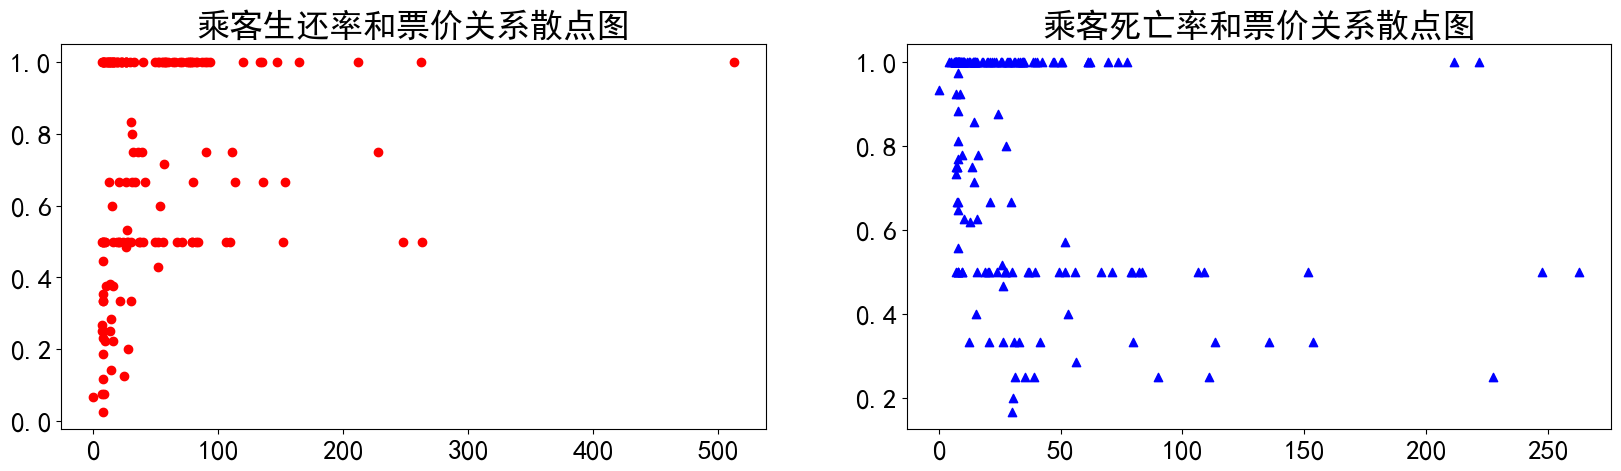

In [46]:
# 两张散点图画在同一张图纸上
plt.figure(figsize=(2*10,5))

# 乘客的生还率和票价关系散点图
axes1=plt.subplot(1,2,1)
axes1.scatter(survived_rate.index,survived_rate,marker='o',color='r')
axes1.set_title('乘客生还率和票价关系散点图')

# 乘客的死亡率和票价关系散点图
axes2=plt.subplot(1,2,2)
axes2.scatter(death_rate.index,death_rate,marker='^',color='b')
axes2.set_title('乘客死亡率和票价关系散点图')